#cifar10_Project


In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

##Data Preparation


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


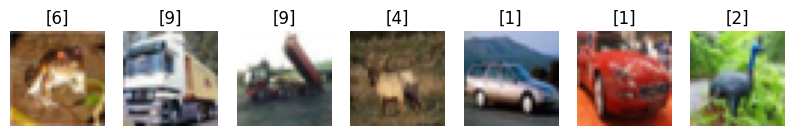

In [ ]:
fig , axes=plt.subplots(1,7, figsize=(10,5))
for i,ax in enumerate(axes):
  ax.imshow(train_images[i], cmap='gray')
  ax.set_axis_off()
  ax.set_title(train_labels[i])

In [ ]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

x_train = train_images.reshape((50000, 32*32*3))
x_test = test_images.reshape((10000, 32*32*3))

In [ ]:
class_names={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [ ]:
x_train.shape

(50000, 3072)

##MLP Model

In [ ]:
inp=layers.Input(shape=(32*32*3,))
x=layers.Dense(64, activation='relu')(inp)
x=layers.Dropout(0.2)(x)
x=layers.Dense(32, activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(16, activation='relu')(x)
x=layers.Dropout(0.2)(x)
out=layers.Dense(10, activation='softmax')(x)

Model_mlp=Model(inp,out)
Model_mlp.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_12 (Dense)            (None, 64)                196672    
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0   

In [ ]:
Model_mlp.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
history1= Model_mlp.fit(x_train, train_labels, epochs=70, batch_size=128, validation_split=0.2)

Epoch 1/70
313/313 [==============================] - 3s 6ms/step - loss: 2.2146 - accuracy: 0.1646 - val_loss: 2.1093 - val_accuracy: 0.2409
Epoch 2/70
313/313 [==============================] - 2s 5ms/step - loss: 2.1256 - accuracy: 0.2042 - val_loss: 2.0238 - val_accuracy: 0.2669
Epoch 3/70
313/313 [==============================] - 1s 5ms/step - loss: 2.0725 - accuracy: 0.2273 - val_loss: 1.9826 - val_accuracy: 0.2883
Epoch 4/70
313/313 [==============================] - 1s 5ms/step - loss: 2.0326 - accuracy: 0.2444 - val_loss: 1.9339 - val_accuracy: 0.3029
Epoch 5/70
313/313 [==============================] - 2s 6ms/step - loss: 2.0011 - accuracy: 0.2578 - val_loss: 1.9118 - val_accuracy: 0.3280
Epoch 6/70
313/313 [==============================] - 2s 6ms/step - loss: 1.9746 - accuracy: 0.2720 - val_loss: 1.8730 - val_accuracy: 0.3448
Epoch 7/70
313/313 [==============================] - 2s 5ms/step - loss: 1.9546 - accuracy: 0.2774 - val_loss: 1.8535 - val_accuracy: 0.3563
Epoch 

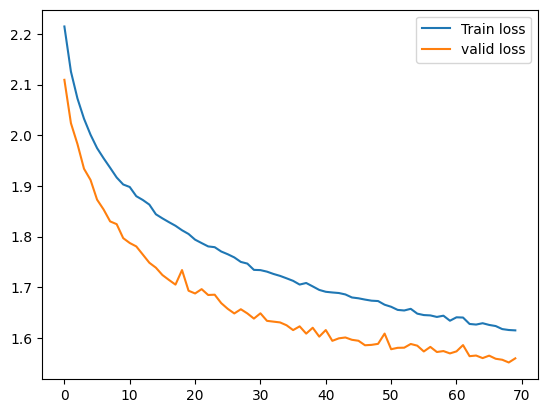

In [ ]:
plt.plot(history1.history['loss'], label='Train loss')
plt.plot(history1.history['val_loss'], label='valid loss')
plt.legend()


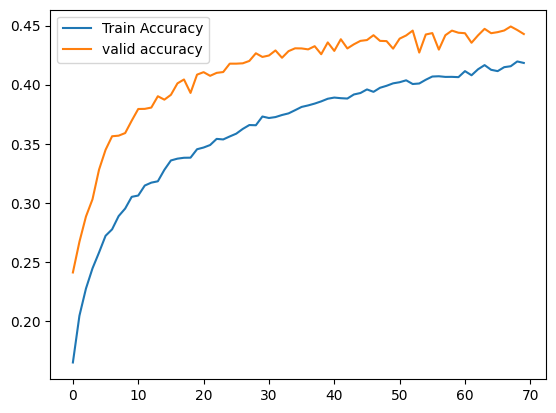

In [ ]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='valid accuracy')
plt.legend()

In [ ]:
Model_mlp.evaluate(x_test, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.5373 - accuracy: 0.4500


[1.5373294353485107, 0.44999998807907104]

##CNN Model

In [ ]:
inp=layers.Input(shape=(32,32,3))
x=layers.Conv2D(64, 3, padding='same')(inp)
x=layers.BatchNormalization()(x)
x=layers.Activation('relu')(x)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(128, 3, padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.Activation('relu')(x)
x=layers.MaxPool2D()(x)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(64, activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(32, activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(16, activation='relu')(x)
x=layers.Dropout(0.2)(x)
out=layers.Dense(10, activation='softmax')(x)

Model_CNN=Model(inp,out)
Model_CNN.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       7385

In [ ]:
reduce_lr=callbacks.ReduceLROnPlateau(patience=3, factor=0.7)
checkpoint=callbacks.ModelCheckpoint('model_v.h5')
cnn_callbacks=[reduce_lr,checkpoint]

In [ ]:
Model_CNN.compile(optimizer=optimizers.Adam(learning_rate=0.005),
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
history2= Model_CNN.fit(train_images, train_labels, epochs=70, batch_size=128, validation_split=0.2, callbacks=cnn_callbacks)

Epoch 1/70
313/313 [==============================] - 8s 15ms/step - loss: 1.9191 - accuracy: 0.2591 - val_loss: 2.7522 - val_accuracy: 0.1892 - lr: 0.0050
Epoch 2/70
  7/313 [..............................] - ETA: 5s - loss: 1.7528 - accuracy: 0.3080

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 13ms/step - loss: 1.6992 - accuracy: 0.3460 - val_loss: 1.8625 - val_accuracy: 0.3200 - lr: 0.0050
Epoch 3/70
313/313 [==============================] - 4s 14ms/step - loss: 1.6028 - accuracy: 0.3848 - val_loss: 1.8638 - val_accuracy: 0.3141 - lr: 0.0050
Epoch 4/70
313/313 [==============================] - 4s 13ms/step - loss: 1.5378 - accuracy: 0.4125 - val_loss: 2.3601 - val_accuracy: 0.2589 - lr: 0.0050
Epoch 5/70
313/313 [==============================] - 4s 14ms/step - loss: 1.4867 - accuracy: 0.4333 - val_loss: 1.6530 - val_accuracy: 0.3904 - lr: 0.0050
Epoch 6/70
313/313 [==============================] - 4s 14ms/step - loss: 1.4393 - accuracy: 0.4526 - val_loss: 1.3838 - val_accuracy: 0.4658 - lr: 0.0050
Epoch 7/70
313/313 [==============================] - 4s 13ms/step - loss: 1.4069 - accuracy: 0.4696 - val_loss: 1.5145 - val_accuracy: 0.4316 - lr: 0.0050
Epoch 8/70
313/313 [==============================] - 4s 13ms/step - loss: 

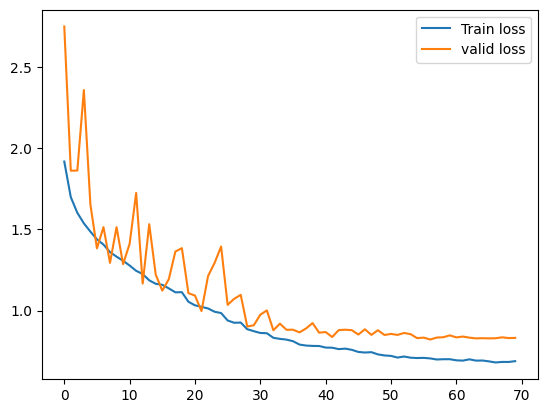

In [ ]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='valid loss')
plt.legend()

In [ ]:
Model_CNN_best=load_model('model_v.h5')

In [ ]:
Model_CNN_best.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.8518 - accuracy: 0.7320


[0.8517873287200928, 0.7319999933242798]

In [ ]:
preds=Model_CNN_best.predict(test_images)
preds_classes=preds.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds_classes, target_names=class_names.values()))

              precision    recall  f1-score   support

    airplane       0.74      0.79      0.76      1000
  automobile       0.83      0.88      0.85      1000
        bird       0.65      0.59      0.62      1000
         cat       0.52      0.53      0.53      1000
        deer       0.71      0.63      0.67      1000
         dog       0.62      0.67      0.64      1000
        frog       0.77      0.78      0.78      1000
       horse       0.77      0.78      0.77      1000
        ship       0.88      0.82      0.84      1000
       truck       0.84      0.85      0.84      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



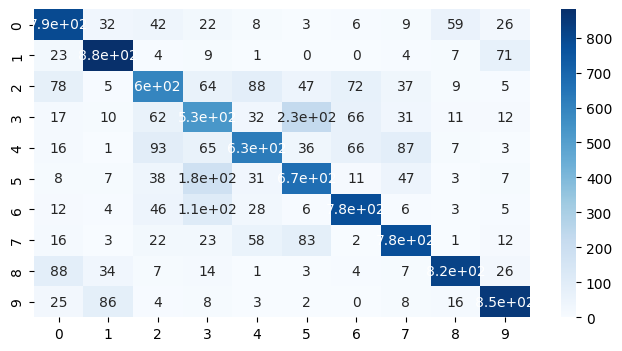

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,4))
matrix=confusion_matrix(test_labels, preds_classes)
ax=sns.heatmap(matrix, cmap='Blues' , annot=True)